<a href="https://colab.research.google.com/github/mathias-driesse/climatehack/blob/main/Transformers_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tensorflow_datasets
!pip install -U 'tensorflow-text==2.8.*'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.9 MB 15.0 MB/s 


In [3]:
import logging
import time

import numpy as np
import matplotlib.pyplot as plt

import tensorflow_datasets as tfds
import tensorflow as tf

import tensorflow_text

In [4]:
examples, metadata = tfds.load('ted_hrlr_translate/pt_to_en', with_info = True,
                               as_supervised = True)

train_examples, val_examples = examples['train'], examples['validation']

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/ted_hrlr_translate/pt_to_en/1.0.0.incomplete3AVGYU/ted_hrlr_translate-train.tfrecord


  0%|          | 0/51785 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/ted_hrlr_translate/pt_to_en/1.0.0.incomplete3AVGYU/ted_hrlr_translate-validation.tfrecord


  0%|          | 0/1193 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/ted_hrlr_translate/pt_to_en/1.0.0.incomplete3AVGYU/ted_hrlr_translate-test.tfrecord


  0%|          | 0/1803 [00:00<?, ? examples/s]

Dataset ted_hrlr_translate downloaded and prepared to /root/tensorflow_datasets/ted_hrlr_translate/pt_to_en/1.0.0. Subsequent calls will reuse this data.


In [5]:
for pt_examples, en_examples in train_examples.batch(4).take(1):
    for pt in pt_examples.numpy():
        print(pt.decode('utf-8'))
    print()
    for en in en_examples.numpy():
        print(en.decode('utf-8'))

e quando melhoramos a procura , tiramos a única vantagem da impressão , que é a serendipidade .
mas e se estes fatores fossem ativos ?
mas eles não tinham a curiosidade de me testar .
e esta rebeldia consciente é a razão pela qual eu , como agnóstica , posso ainda ter fé .

and when you improve searchability , you actually take away the one advantage of print , which is serendipity .
but what if it were active ?
but they did n't test for curiosity .
and this conscious defiance is why i , as an agnostic , can still have faith .


In [6]:
model_name = 'ted_hrlr_translate_pt_en_converter'
tf.keras.utils.get_file(
    f'{model_name}.zip',
    f'https://storage.googleapis.com/download.tensorflow.org/models/{model_name}.zip',
    cache_dir='.', cache_subdir='', extract=True
)

196608/184801 [===============================] - 0s 0us/step


'./ted_hrlr_translate_pt_en_converter.zip'

In [7]:
tokenizers = tf.saved_model.load(model_name)

In [8]:
[item for item in dir(tokenizers.en) if not item.startswith('_')]

['detokenize',
 'get_reserved_tokens',
 'get_vocab_path',
 'get_vocab_size',
 'lookup',
 'tokenize',
 'tokenizer',
 'vocab']

In [9]:
for en in en_examples.numpy():
    print(en.decode('utf-8'))

and when you improve searchability , you actually take away the one advantage of print , which is serendipity .
but what if it were active ?
but they did n't test for curiosity .
and this conscious defiance is why i , as an agnostic , can still have faith .


In [10]:
encoded = tokenizers.en.tokenize(en_examples)

for row in encoded.to_list():
    print(row)

[2, 72, 117, 79, 1259, 1491, 2362, 13, 79, 150, 184, 311, 71, 103, 2308, 74, 2679, 13, 148, 80, 55, 4840, 1434, 2423, 540, 15, 3]
[2, 87, 90, 107, 76, 129, 1852, 30, 3]
[2, 87, 83, 149, 50, 9, 56, 664, 85, 2512, 15, 3]
[2, 72, 81, 2508, 2159, 3072, 1282, 80, 192, 45, 13, 100, 111, 6040, 3176, 3186, 13, 94, 235, 89, 1938, 15, 3]


In [11]:
round_trip = tokenizers.en.detokenize(encoded)
for line in round_trip.numpy():
    print(line.decode('utf-8'))

and when you improve searchability , you actually take away the one advantage of print , which is serendipity .
but what if it were active ?
but they did n ' t test for curiosity .
and this conscious defiance is why i , as an agnostic , can still have faith .


In [12]:
tokens = tokenizers.en.lookup(encoded)
tokens

<tf.RaggedTensor [[b'[START]', b'and', b'when', b'you', b'improve', b'search', b'##ability',
  b',', b'you', b'actually', b'take', b'away', b'the', b'one', b'advantage',
  b'of', b'print', b',', b'which', b'is', b's', b'##ere', b'##nd', b'##ip',
  b'##ity', b'.', b'[END]']                                                 ,
 [b'[START]', b'but', b'what', b'if', b'it', b'were', b'active', b'?',
  b'[END]']                                                           ,
 [b'[START]', b'but', b'they', b'did', b'n', b"'", b't', b'test', b'for',
  b'curiosity', b'.', b'[END]']                                          ,
 [b'[START]', b'and', b'this', b'conscious', b'de', b'##fi', b'##ance',
  b'is', b'why', b'i', b',', b'as', b'an', b'ag', b'##no', b'##stic', b',',
  b'can', b'still', b'have', b'faith', b'.', b'[END]']                     ]>

In [14]:
lengths = []
for pt_examples, en_examples in train_examples.batch(1024):
    pt_tokens = tokenizers.en.tokenize(pt_examples)
    lengths.append(pt_tokens.row_lengths())

    en_tokens = tokenizers.en.tokenize(en_examples)
    lengths.append(en_tokens.row_lengths())
    print('.', end = '', flush = True)

...................................................

Text(0.5, 1.0, 'Max tokens per example: 394')

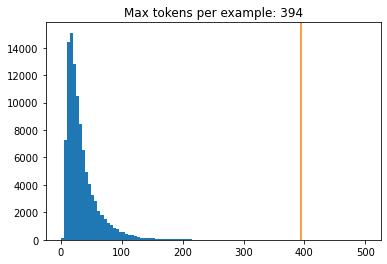

In [15]:
all_lengths = np.concatenate(lengths)

plt.hist(all_lengths, np.linspace(0, 500, 101))
plt.ylim(plt.ylim())
max_length = max(all_lengths)
plt.plot([max_length, max_length], plt.ylim())
plt.title(f'Max tokens per example: {max_length}')

In [16]:
MAX_TOKENS = 128

In [17]:
def filter_max_tokens(pt, en):
    num_tokens = tf.maximum(tf.shape(pt)[1], tf.shape(en)[1])
    return num_tokens < MAX_TOKENS

In [18]:
def tokenize_pairs(pt, en):
    pt = tokenizers.pt.tokenize(pt)
    pt = pt.to_tensor()

    en = tokenizers.en.tokenize(en)
    en = en.to_tensor()
    return pt, en

In [19]:
for pt_examples, en_examples in train_examples.batch(1024):
    print(tokenize_pairs(pt_examples, en_examples))

(<tf.Tensor: shape=(1024, 146), dtype=int64, numpy=
array([[   2,   44,  115, ...,    0,    0,    0],
       [   2,   99,   44, ...,    0,    0,    0],
       [   2,   99,  131, ...,    0,    0,    0],
       ...,
       [   2,  131,  109, ...,    0,    0,    0],
       [   2,   40, 1037, ...,    0,    0,    0],
       [   2,  168,   15, ...,    0,    0,    0]])>, <tf.Tensor: shape=(1024, 171), dtype=int64, numpy=
array([[  2,  72, 117, ...,   0,   0,   0],
       [  2,  87,  90, ...,   0,   0,   0],
       [  2,  87,  83, ...,   0,   0,   0],
       ...,
       [  2,  83,  86, ...,   0,   0,   0],
       [  2,  71, 261, ...,   0,   0,   0],
       [  2,  79, 125, ...,   0,   0,   0]])>)
(<tf.Tensor: shape=(1024, 244), dtype=int64, numpy=
array([[   2,   89,  341, ...,    0,    0,    0],
       [   2,  316,   14, ...,    0,    0,    0],
       [   2,   10, 6052, ...,    0,    0,    0],
       ...,
       [   2,   44,  610, ...,    0,    0,    0],
       [   2,  115,   89, ...,    0,   

KeyboardInterrupt: ignored

In [20]:
BUFFER_SIZE = 20000
BATCH_SIZE = 64

In [22]:
def make_batches(ds):
    return (
        ds
        .cache()
        .shuffle(BUFFER_SIZE)
        .batch(BATCH_SIZE)
        .map(tokenize_pairs, num_parallel_calls = tf.data.AUTOTUNE)
        .filter(filter_max_tokens)
        .prefetch(tf.data.AUTOTUNE)
    )

train_batches = make_batches(train_examples)
val_batches = make_batches(val_examples)